In [62]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

In [63]:
train_df =pd.read_csv('../Data/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [64]:
age_null =train_df[train_df.Age.isnull()]
age_not_null =train_df[train_df.Age.notnull()]
len(age_null)+ len(age_not_null)

891

In [65]:
train_df.info(
    
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [66]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [67]:
# Survived와 Pclass 기준으로 Dataset 정렬 : 정렬후 index 재정리 필요

train_df =train_df.sort_values(by=['Survived','Pclass']).reset_index(drop=True)
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


In [68]:
train_df.shape

(891, 12)

In [69]:
print(f'사망자수 : {train_df[train_df.Survived == 0].shape}') #사망자수
print(f'생존자수 : {train_df[train_df.Survived == 1].shape}') #생존자수

사망자수 : (549, 12)
생존자수 : (342, 12)


In [70]:
# 생존과 사망의 DataFrame 만들기
result=[len(train_df[train_df.Survived == 0]),len(train_df[train_df.Survived == 1])]

live_death =pd.DataFrame(
    {
        'Result' :result
    },
    index=['사망','생존']
)
live_death

,Result
사망,549
생존,342


In [71]:
# Pie Chart
import matplotlib.pyplot as plt
import koreanize_matplotlib

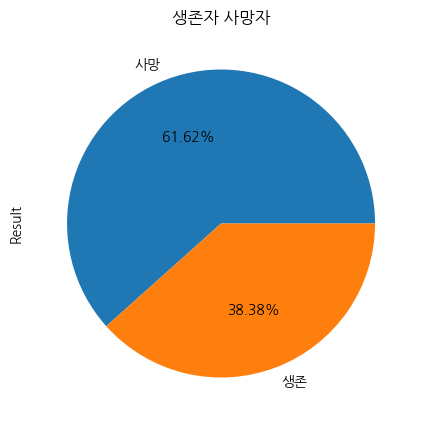

In [72]:
plt.figure(figsize=(14,5))
live_death.Result.plot(
    kind='pie',
    autopct='%.2f%%'
)
plt.title('생존자 사망자')
plt.show()

> Target의 비율이 60%보다 크므로 Target으로 약간 아쉽지만 적합하다

-----
### Feature 컬럼 선택

In [73]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
1,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
2,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,NaN,C
3,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,NaN,C
4,36,0,1,"Holverson, Mr. Alexander Oskar",male,42.0,1,0,113789,52.0000,NaN,S


# Sex컬럼이 Feature로 적합한지 확인
: null도 없고 category갯수도 적다.

In [ ]:
train_df.describe()#ㅇㅇㅇ

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [75]:
train_df.Sex.value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

> 남성의 승선수가 여성의 승선수 보다 거의 2배이다.
Feature는 차이가 특성이 필요한데, 일단 승선수만 보면 Feature로 사용할 수 있을 것 같다.

#### Target 컬럼과 연결하여 Feature가 될수 있는지 확인

In [76]:
# 여성의 생존과 사망수
female_survived =train_df[(train_df.Sex =='female')&(train_df.Survived ==1)].shape[0]
female_death =train_df[(train_df.Sex =='female')&(train_df.Survived ==0)].shape[0]

print(f'여성의 생존수는 {female_survived}이고 사망수는 {female_death}이다')

여성의 생존수는 233이고 사망수는 81이다


In [77]:
# 여성의 생존과 사망수
male_survived =train_df[(train_df.Sex =='male')&(train_df.Survived ==1)].shape[0]
male_death =train_df[(train_df.Sex =='male')&(train_df.Survived ==0)].shape[0]

print(f'남성의 생존수는 {male_survived}이고 사망수는 {male_death}이다')

남성의 생존수는 109이고 사망수는 468이다


> 여성과 남성의 생존여부를 연결하여 특징을 보았는데 성별로 정반대의 특징이 나타난다.    
Sex컬럼은 Feature로서 충분히다.

----- 
### Pclass의 Feature확인

In [78]:
# Pclass의 카테고리 분포 확인
train_df.Pclass.value_counts().sort_index()

Pclass
1    216
2    184
3    491
Name: count, dtype: int64

> 객실의 등급별 인원수로 보아 1,2등급은 크게 차이나징낳지만 1과3 그리고 2와3은 차이가 있어 Feature의 가능성이 보임

#### [Survived] <-->[Sex,Pclass확인]

In [79]:
# 1등 객실 여성 생존자율
female_count =train_df[(train_df.Sex=='female') &(train_df.Pclass ==1)].shape[0]
female_live =train_df[(train_df.Sex=='female') &(train_df.Pclass ==1)&(train_df.Survived ==1)].shape[0]
print(f'1등 객실의 여성의 생존율은 {female_live}/{female_count}로 {round(female_live/female_count*100)}% 이다')

1등 객실의 여성의 생존율은 91/94로 97% 이다


In [80]:
for i in range(1,3+1):
    female_count =train_df[(train_df.Sex=='female') &(train_df.Pclass ==i)].shape[0]
    female_live =train_df[(train_df.Sex=='female') &(train_df.Pclass ==i)&(train_df.Survived ==1)].shape[0]
    print(f'{i}등 객실의 여성의 생존율은 {female_live}/{female_count}로 {round(female_live/female_count*100)}% 이다')

1등 객실의 여성의 생존율은 91/94로 97% 이다
2등 객실의 여성의 생존율은 70/76로 92% 이다
3등 객실의 여성의 생존율은 72/144로 50% 이다


In [81]:
se =['male','female']
# 1,2,3등 객실의 여성 남성 생존율
for sex in se:
    for i in range(1,3+1):
        female_count =train_df[(train_df.Sex==sex) &(train_df.Pclass ==i)].shape[0]
        female_live =train_df[(train_df.Sex==sex) &(train_df.Pclass ==i)&(train_df.Survived ==1)].shape[0]
        print(f'{i}등 객실의 {"남성" if sex == "male" else "여성"}의 생존율은 {female_live}/{female_count:>3}로 {round(female_live/female_count*100,2):0^5}% 이다')
    print('-'*20)

1등 객실의 남성의 생존율은 45/122로 36.89% 이다
2등 객실의 남성의 생존율은 17/108로 15.74% 이다
3등 객실의 남성의 생존율은 47/347로 13.54% 이다
--------------------
1등 객실의 여성의 생존율은 91/ 94로 96.81% 이다
2등 객실의 여성의 생존율은 70/ 76로 92.11% 이다
3등 객실의 여성의 생존율은 72/144로 50.00% 이다
--------------------


----
[Survivied] <- [Sex,Pclass]로 결정

In [82]:
train_df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [83]:
# Nan인 데이터 찾기 
train_df[train_df.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
556,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
672,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [84]:
# 항구별 승선 인원 
train_df.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

> nan -> S

In [85]:
train_df.loc[train_df.Embarked.isnull(),'Embarked'] ='S'
train_df.Embarked.value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [86]:
# 항구별 성별 승선 인원
train_df.groupby(
    ['Embarked','Sex']
).size()

Embarked  Sex   
C         female     73
          male       95
Q         female     36
          male       41
S         female    205
          male      441
dtype: int64

In [87]:
# 항구별 생존 인원
train_df.groupby(
    ['Embarked','Survived']
).size()

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           219
dtype: int64

In [88]:
# 항구별 객실등급 인원
train_df.groupby(
    ['Embarked','Pclass']
).size()

Embarked  Pclass
C         1          85
          2          17
          3          66
Q         1           2
          2           3
          3          72
S         1         129
          2         164
          3         353
dtype: int64

[Survived ]<-[Sex,Pclass,Embarked]

In [89]:
train=train_df[['Survived','Sex','Pclass','Fare','Embarked']]
train

,Survived,Sex,Pclass,Fare,Embarked
0,0,male,1,51.8625,S
1,0,male,1,263.0000,S
2,0,male,1,27.7208,C
3,0,male,1,82.1708,C
4,0,male,1,52.0000,S
...,...,...,...,...,...
886,1,male,3,56.4958,S
887,1,female,3,9.3500,S
888,1,female,3,19.2583,C
889,1,male,3,11.1333,S


In [90]:
# Sex컬럼을 SexCode로 숫자화 시킨다 
train.loc[train.Sex =='female','SexCode']=0
train.loc[train.Sex =='male','SexCode']=1

In [91]:
# Sex컬럼 삭제 
del train['Sex']
train.head()

,Survived,Pclass,Fare,Embarked,SexCode
0,0,1,51.8625,S,1.0
1,0,1,263.0000,S,1.0
2,0,1,27.7208,C,1.0
3,0,1,82.1708,C,1.0
4,0,1,52.0000,S,1.0


In [92]:
#One-hot-encoding으로 Embarked 정리 
train_ml=pd.get_dummies(
    data=train,
    columns=['Embarked']
)

In [93]:
train_ml.head()

,Survived,Pclass,Fare,SexCode,Embarked_C,Embarked_Q,Embarked_S
0,0,1,51.8625,1.0,False,False,True
1,0,1,263.0000,1.0,False,False,True
2,0,1,27.7208,1.0,True,False,False
3,0,1,82.1708,1.0,True,False,False
4,0,1,52.0000,1.0,False,False,True


In [94]:
def fare_category(x):
    if x == 0:
        return '무료'
    elif x < 14:
        return '저가'
    elif x < 31:
        return '중가'
    else:
        return '고가'



In [95]:
train_ml['family'] = train_df['SibSp'] +train_df['Parch'] +1

In [96]:

train_ml['Fare_cat'] = train_ml['Fare'].apply(fare_category)

In [97]:
mapping = {'무료': 0, '저가': 1, '중가': 2, '고가': 3}
train_ml['Fare_code'] = train_ml['Fare_cat'].map(mapping)

train_ml[['Fare', 'Fare_cat', 'Fare_code']].head()

,Fare,Fare_cat,Fare_code
0,51.8625,고가,3
1,263.0000,고가,3
2,27.7208,중가,2
3,82.1708,고가,3
4,52.0000,고가,3


In [98]:
train_ml.head()

,Survived,Pclass,Fare,SexCode,Embarked_C,Embarked_Q,Embarked_S,family,Fare_cat,Fare_code
0,0,1,51.8625,1.0,False,False,True,1,고가,3
1,0,1,263.0000,1.0,False,False,True,6,고가,3
2,0,1,27.7208,1.0,True,False,False,1,중가,2
3,0,1,82.1708,1.0,True,False,False,2,고가,3
4,0,1,52.0000,1.0,False,False,True,2,고가,3


In [99]:
del train_ml['Fare_cat']
train_ml.head()

,Survived,Pclass,Fare,SexCode,Embarked_C,Embarked_Q,Embarked_S,family,Fare_code
0,0,1,51.8625,1.0,False,False,True,1,3
1,0,1,263.0000,1.0,False,False,True,6,3
2,0,1,27.7208,1.0,True,False,False,1,2
3,0,1,82.1708,1.0,True,False,False,2,3
4,0,1,52.0000,1.0,False,False,True,2,3


In [100]:
del train_ml['Fare']
train_ml.head()

,Survived,Pclass,SexCode,Embarked_C,Embarked_Q,Embarked_S,family,Fare_code
0,0,1,1.0,False,False,True,1,3
1,0,1,1.0,False,False,True,6,3
2,0,1,1.0,True,False,False,1,2
3,0,1,1.0,True,False,False,2,3
4,0,1,1.0,False,False,True,2,3


In [101]:
# 항구별 객실등급 인원
train_ml.groupby(
    ['Pclass','Fare_code']
).size()

Pclass  Fare_code
1       0              5
        1              1
        2             48
        3            162
2       0              6
        1             85
        2             71
        3             22
3       0              4
        1            335
        2            111
        3             41
dtype: int64

In [102]:
for i in range(0,3+1):
    female_count =train_ml[(train_ml.Fare_code==i)].shape[0]
    female_live =train_ml[(train_ml.Fare_code==i)&(train_ml.Survived ==1)].shape[0]
    print(f'무료로 탄 승객들의 생존율은 {female_live}/{female_count}로 {round(female_live/female_count*100)}% 이다')

무료로 탄 승객들의 생존율은 1/15로 7% 이다
무료로 탄 승객들의 생존율은 110/421로 26% 이다
무료로 탄 승객들의 생존율은 100/230로 43% 이다
무료로 탄 승객들의 생존율은 131/225로 58% 이다


In [103]:
female_count

225

----
#### RandomForest로 예측 확인

In [104]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

In [105]:
# train과 Test 분리
train_data,test_data,train_target,test_target =train_test_split(
                                                train_ml.iloc[:,1:],
                                                train_ml['Survived'],
                                                random_state=42,
                                                stratify=train_ml['Survived']

)

In [106]:
print(train_data.shape)
print(test_data.shape)
print(train_target.shape)
print(test_target.shape)

(668, 7)
(223, 7)
(668,)
(223,)


In [107]:
clf =RandomForestClassifier()
clf.fit(train_data,train_target)
print('train :',clf.score(train_data,train_target))
print('test :',clf.score(test_data,test_target))

train : 0.8368263473053892
test : 0.8116591928251121


In [108]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Cross Validation

In [109]:
from sklearn.model_selection import cross_val_score

In [110]:
scores =cross_val_score(
                    clf,
                    train_ml.loc[:,'Pclass':],
                    train_ml['Survived'],
                    cv=5,
                    scoring='accuracy'
)
scores

array([0.53631285, 0.75842697, 0.75842697, 0.78089888, 0.70224719])

In [111]:
scores.mean()

0.7072625698324022

In [112]:
from xgboost import XGBClassifier

In [113]:
from sklearn.model_selection import cross_validate

In [ ]:
xgb=XGBClassifier(
    tree_method ='hist',
    random_state=42,
    use_label_encoder =False,
    eval_metric='logloss'
)

In [115]:
xgb.fit(train_data,train_target)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'logloss'


In [116]:
print(xgb.score(train_data,train_target))
print(xgb.score(test_data,test_target))

0.8368263473053892
0.8116591928251121


In [117]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

In [118]:
pred=clf.predict(test_data)
conf_matrix =confusion_matrix(test_target,pred)

conf_matrix

array([[120,  17],
       [ 25,  61]], dtype=int64)

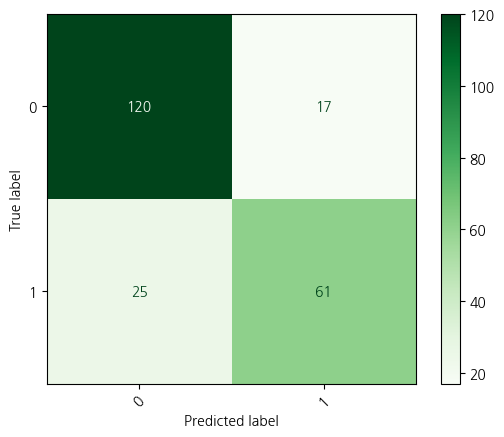

In [119]:
disp =ConfusionMatrixDisplay(
    confusion_matrix=conf_matrix,
    display_labels=sorted(test_target.unique())
)

disp.plot(
    cmap=plt.cm.Greens,
    xticks_rotation=45
)
plt.show()

In [120]:
17/120+17

17.141666666666666

In [121]:
25/61+25

25.40983606557377

In [ ]:
#save